# GEOG5302M / Week 2

## Introduction to statistics

Welcome to Lab 2 for GEOG5302M Data Science. In the last lab, you've explored different types of data and explored the fundamentals of using Python.

This week we'll looking at the basic of describing our data with statistics, and comparing whether different groups are statistically different. Building on what we just covered in the lecture, we'll start to implement some of these statistical concepts and methods.

Once you start to use the stats tests in scipy, you'll start to realise the format for the code between tests is generally similar.

Keep an eye on how you interpret p-values for normality and tests for difference, as this can be a little tricky.

## Importing packages

First of all, we will need to import Pandas and Numpy; these library are very commonly used for their data manipulation, analysis, and numerical operation abilities (functions). As you will have come to realise, we cannot look at data and aim at describing it without actually being able to see it, so we will import Matplotlib and Seaborn, next week you will go over the basics of visualisation, so for todays session you get to enjoy the figures without having to worrying about making adjustments to them. Finally, we will import SciPy, a library with many statistical functions.

In [1]:
import pandas as pd  # Importing pandas
import numpy as np  # Importing numpy
import matplotlib.pyplot as plt  # Importing matplotlib's pyplot
import seaborn as sns  # Importing seaborn
from scipy.stats import shapiro  # Importing Shapiro-Wilk test
from scipy.stats import kruskal  # Importing Kruskal-Wallis test
from scipy.stats import ttest_ind  # Importing independent samples t-test

## Data

Let's load up our dataset - today we will start with seaborns Penguins data.

In [2]:
penguins = sns.load_dataset('penguins') #notice how we are loading in this dataset differently as it comes packaged with the seabourne library
penguins = penguins.dropna() #today we will drop the missing ('na') values as we are focussing on the statistics themselves, but this would not always be the best decision!

It's always best practice to check what the data looks like. It also helps to assure us that it has loaded correctly

In [3]:
print(penguins.head()) #this 'prints' (displays) the first few rows of the dataset

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## Descriptive statistics

Let's see what we are dealing with. Using descriptive statistics early on when you have a new dataset is a fundamental part of a process called EDA, or Exploratory Data Analysis.

We'll pick one variable to start with; flipper length. Using the table above, complete the following code with the variable name (replace the XXXXXX)

In [5]:
mean_flipper = penguins['flipper_length_mm'].mean()
print(mean_flipper) #print the result

200.96696696696696


Lets bring in some simple arithmatic. What is the mean in cm? An easy mental calculation, but lets do this via code below... replace the XX with a value

In [6]:
mean_flipper_cm = mean_flipper / 10
print(mean_flipper_cm) #print the result

20.096696696696696


Lets stick with mm going forwards, it much more useful in this context. Now that you have calculated one type of average (the mean), lets calculate the median and mode so we can see if there is a difference in these statistics.

In [7]:
median_flipper = penguins['flipper_length_mm'].median() #median of flipper length
mode_flipper = penguins['flipper_length_mm'].mode()[0] #mode of flipper length

Where are the results of our code? The above code block only assigns the value to the variable names we have defined, i.e. median_flipper. As with the mean, display the median and mode values using 'print'.

In [8]:
print(median_flipper)#print the median result
print(mode_flipper) #print the mode result

197.0
190.0


The median has given us the value that is in the middle when the length are sorted in order. The mode has given us the most common (the value that has the highest frequency). The '[0]' is asking for the return of the first mode, as datasets can have multiple 'modes' (for example, there could be two values that occur at the same frequency in the dataset).

Lets see what the data looks like visually. Visualisation is important to help us understand the distribution of the data. We'll use two types of plots that are very common; histograms, and boxplots. We will start with a histogram. We group the flipper lengths into groups, and add a smoothed curve to help us see the general shape of the data. Plot title, and x and y axis labels will be added, but again don't worry too much about finessing your figures today, this will be covered in more depth later on in the module.

Text(0, 0.5, 'Frequency')

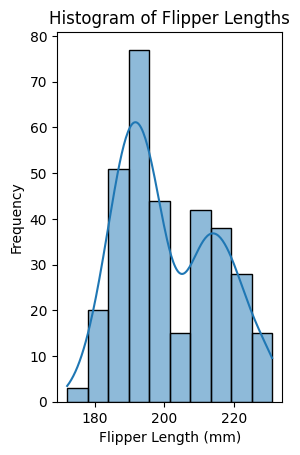

In [9]:
# Histogram
plt.subplot(1, 2, 1) # you'll explore this more later in the course. Essentially you are telling the function to plot a subplot within the figure - i.e. you can display multiple plots together.
sns.histplot(penguins['flipper_length_mm'], bins=10, kde=True) # Bins are the number of groups that determines how the data is grouped into intervals. Here we have 10. 'kde' adds a Kernel Density Estimate (KDE) - this smoothes the curve of the data.
plt.title('Histogram of Flipper Lengths')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')


The data is not looking normal (we would not expect two peaks). Building on from the lecture, it looks like we have been presented with non-normal data! There is a name for this type of distinctive two peak distribution; it's a bimodal distribution. Here we are looking at penguin flipper lengths, and we already know that 'species' is included in the data as a seperate column. The presence of the column suggests that multiple species are present (otherwise why include this column?). The two peaks suggests there are two groups in this data. Lets check if our assumption is correct.

In [10]:
num_species = penguins['species'].nunique() #number of unique species in the dataset
print(f"Number of unique penguin species: {num_species}") #prints the number of unique penguin species, this time with are including text that will be displayed before the value.

Number of unique penguin species: 3


If we wanted to know what the species name were, we could use the following code. Notice how we have not calculated anything new, or created any new variables.

In [11]:
print("Species present in the dataset:", penguins['species'].unique())

Species present in the dataset: ['Adelie' 'Chinstrap' 'Gentoo']


Whereas the histogram allows us to see how the data is visualised, it does not include the other useful visual descriptive elements. A boxplot can give us more information about our data, lets plot one and then look at what it is doing (replace the XXXXXs in the code). What would be a good title and descriptive label for y?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


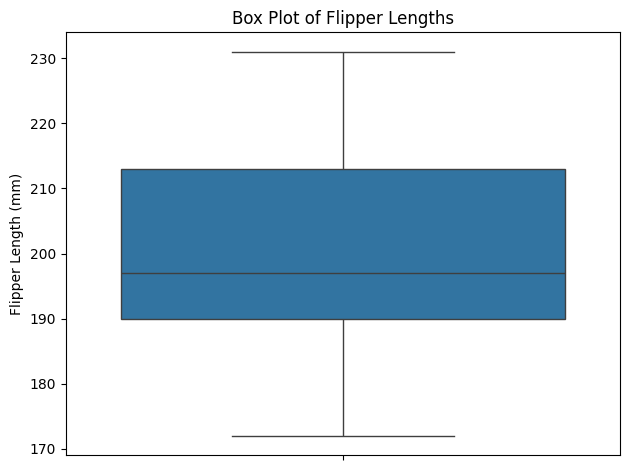

In [13]:
# Box Plot
sns.boxplot(y=penguins['flipper_length_mm'])
plt.title('Box Plot of Flipper Lengths')
plt.ylabel('Flipper Length (mm)')

plt.tight_layout()
plt.show()

*Extra snippet: you'll notice an warning message. This is telling us that the '.grouper' in the pandas library is scheduled to be removed in a future version of pandas, i.e. it is being deprecated. As we are plotting with a seasborn function, its telling us that seaborn is interacting with pandas in a way that might cause errors in the future. Libraries are regularly updated by creators, especially the larger well know libraries such as seaborn. We can ususually expect seaborn will be updated in time, but if we encountered a sitation like this in our code, we would have to think of an alternative way of coding for our desired result.*

Boxplots are useful as they show where the median is (the line through the middle of the box), and the interquartile rnage. Do you remember what percentage of values are within the shaded box? The 'whiskers' (lines that extend beyond the top and bottom of the box) show the upper and lower. Outliers would be represented as individual points beyond these whiskers.

## Bill length and body mass

Now, produce a histogram and boxplot for bill length and body mass.

We'll start with bill length. You know what to do, replace the XXXXXXs!

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


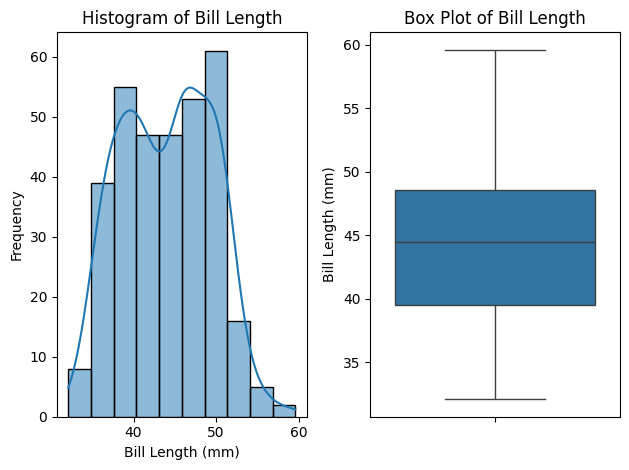

In [14]:

# Histogram of Bill Length
plt.subplot(1, 2, 1)
sns.histplot(penguins['bill_length_mm'], bins=10, kde=True)
plt.title('Histogram of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')

# Box Plot of Bill Length
plt.subplot(1, 2, 2)
sns.boxplot(y=penguins['bill_length_mm'])
plt.title('Box Plot of Bill Length')
plt.ylabel('Bill Length (mm)')

plt.tight_layout()
plt.show()



Now, produce the histogram and box plot for body mass. This time, complete all the code needed, refer to above if you get stuck!

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


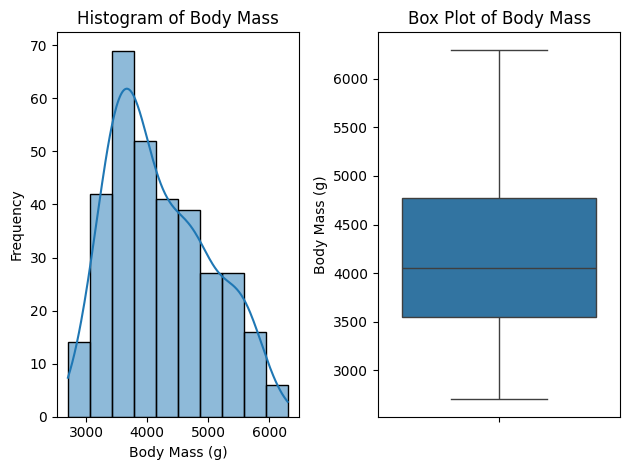

In [19]:

# Histogram of Body Mass
plt.subplot(1, 2, 1)
sns.histplot(penguins['body_mass_g'], bins=10, kde=True)
plt.title("Histogram of Body Mass")
plt.ylabel("Frequency")
plt.xlabel("Body Mass (g)")

# Box Plot of Body Mass
plt.subplot(1, 2, 2)
sns.boxplot(y=penguins['body_mass_g'])
plt.ylabel("Body Mass (g)")
plt.title("Box Plot of Body Mass")

plt.tight_layout()
plt.show()

## Normality testing

One of those histograms looks like it not a bimodal distribution. Lets use a statistical test to check if the data is normal. You already know of the Anderson-Darling test from the lecture, but here we will introduce another normality test; Shapiro-Wilk. Anderson-Darling is a common normality test , but Shapiro-Wilk has advantages in the case of our data;

*   Shaprio-Wilk is often used in smaller to moderate sample sizes.
*   It is a general purpose test for normality. But Anderson-Darling can be used for multiple distributions.
*   Simpler interpretation due to it providing a p-value directly.



In [20]:
stat, p_value_flipper_length = shapiro(penguins['flipper_length_mm']) #we are assigning the p-value from the test to the variable 'p_value'
print("Shapiro-Wilk Test p-value:", p_value_flipper_length)

Shapiro-Wilk Test p-value: 5.393184873708796e-09


The format of the value the p-value is called 'scientific notation', if we were to manually write this out, we would get 0.000000005393184873708796. The 'e-09' means we move the decimal place 9 places to the left. If it had been e+09, we would have moved the decimal place 9 places to the right to become 5,393,184,873.708796. Make sure you pay attention to either it is a negative or postive exponent, as this can completly change your interpretation!



As the p-value is < 0.05, the test is telling us that the data is not normally distributed.

Now test the bill length and body mass for normality using the Shapiro-Wilk test. Make sure to name the variable something meaningful, and not just 'stat', as otherwise we will start overwriting our variables!

In [24]:
# Shapiro-Wilk test for bill length
bill_stat, p_value_bill_length = shapiro(penguins['bill_length_mm'])
print("Shapiro-Wilk Test p-value for bill length:", p_value_bill_length)

# Shapiro-Wilk test for body mass
body_stat, p_value_body_mass = shapiro(penguins['body_mass_g'])
print("Shapiro-Wilk Test p-value for body mass:", p_value_body_mass)


Shapiro-Wilk Test p-value for bill length: 1.189965972431551e-05
Shapiro-Wilk Test p-value for body mass: 3.567711408268874e-08


In our excitement of exploring the pengiun data, **we're overlooked a very important factor when normality testing**....

We cannot undertake tests for normality using all of the penguin species data together. Our results would not be valid! Lets remedy this for flipper length before moving on. We'll use a for loop, but we won't go into the details this session. As you continue to code, you'll come across more mechanisms to make your coding faster, so lets run this and get back to statistics. We could have also dont this manually writing out seperate code for each species.

In [25]:
species_list = penguins['species'].unique() #list of each unique species name (i.e. string of text) within the 'species' column

# the following is a for loop, we don't cover these this session, but do pay attention to how it makes your code more efficient, and 'clean'
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    stat, p_value = shapiro(species_data)
    print(f"Shapiro-Wilk Test p-value for {species} species: {p_value}")

Shapiro-Wilk Test p-value for Adelie species: 0.7427425665590469
Shapiro-Wilk Test p-value for Chinstrap species: 0.8106446568669052
Shapiro-Wilk Test p-value for Gentoo species: 0.0017599825253668117


## Testing for difference (non-parametric)

Do the results show the data is still showing a non-normal distribution? Remember - if all data was normally distributed, we would have used a parametric test for difference.... but in this case the Gentoo species is non normally distributed, so we will use a non-parametric alternative, in this case the Kruskal Wallis test. Complete the species names in the code.

In [26]:
from scipy.stats import kruskal

#lets seperate out the different species
adelie_flipper = penguins[penguins['species'] == 'Adelie']['flipper_length_mm']
chinstrap_flipper = penguins[penguins['species'] == 'Chinstrap']['flipper_length_mm']
gentoo_flipper = penguins[penguins['species'] == 'Gentoo']['flipper_length_mm']

Now lets plug this data into our Kruskal-Wallis test.

In [27]:
# Perform Kruskal-Wallis H test
stat, p_value = kruskal(adelie_flipper, chinstrap_flipper, gentoo_flipper)
print("Kruskal-Wallis Test p-value:", p_value)

Kruskal-Wallis Test p-value: 2.890851468876692e-52


*Extra snippet: Have you noticed that I have assigned the value to the variable name 'p_value'. You can very quickly lose track when coding, and overwrite a variable you'd previously assigned. Best practice here it vary the name, e.g. in this instance we could have called it 'p_value_KH_flipper'.*

Replace the XXXXXs with the seperate species flipper data.

In [28]:
#Giving our p-value a better name
stat, p_value_KH_flipper = kruskal(adelie_flipper, chinstrap_flipper, gentoo_flipper)
print("Kruskal-Wallis Test p-value:", p_value)

Kruskal-Wallis Test p-value: 2.890851468876692e-52


The Kruskal-Wallis test checks if there are statistically significant differences between the medians of the groups. If 'p < 0.05', we reject the null hypothesis, meaning there is a significant difference between the groups. In this case, since the p-value is extremely small (2.890851468876692e-52), we reject the null hypothesis and conclude that there is a significant difference in flipper length among the three penguin species.

## Testing for difference (parametric)

Let now look at what we do for two samples that both have normal distributions. We've decided to look at the Adelie and Chinstrap penguin species, specifically their bill depth. First we need to check if they are normally distrbuted:

In [29]:
# First, let's separate out the variables
adelie_bill_depth = penguins[penguins['species'] == 'Adelie']['bill_depth_mm']
chinstrap_bill_depth = penguins[penguins['species'] == 'Chinstrap']['bill_depth_mm']


Now, we are in a ready to run our normality test. Complete the following code blocks. Make sure to print the values!

In [31]:
# Shapiro-Wilk test for Adelie bill depth
adelie_bill_depth_stat, p_value_bill_depth = shapiro(adelie_bill_depth)
print("Shapiro-Wilk Test p-value for Adelie bill depth:", p_value_bill_depth)

# Shapiro-Wilk test for Chinstrap bill depth
chinstrap_bill_depth_stat, p_value_bill_depth = shapiro(chinstrap_bill_depth)
print("Shapiro-Wilk Test p-value for Chinstrap bill depth:", p_value_bill_depth)


Shapiro-Wilk Test p-value for Adelie bill depth: 0.10472206497139075
Shapiro-Wilk Test p-value for Chinstrap bill depth: 0.14178462574530515


If p > 0.05, we accept the null hypothesis that the data is normally distributed.
In this case, both p-values are greater than 0.05, so we can proceed with a parametric test.

It's easy to start mixing up the interpretation at this stage, so lets go back to basics for the t-test.

Null Hypothesis (H₀): There is no significant difference between the bill depths of Adelie and Chinstrap penguins.

Alternative Hypothesis (H₁): There is a significant difference between the bill depths of Adelie and Chinstrap penguins.

Since the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating no significant difference between the means of the two groups.

Now, use the appropriate test for testing for difference between the Adelie and Chinstrap penguin flipper lengths. If you get stuck, look back at the code you have worked through.

In [ ]:
# Separate the variables
adelie_flipper_length = penguins[penguins['species'] == 'Adelie']['flipper_length_mm']
chinstrap_flipper_length = penguins[penguins['species'] == 'Chinstrap']['flipper_length_mm']

# Shapiro-Wilk test for Adelie flipper length
#
#

# Shapiro-Wilk test for Chinstrap flipper length
#
#

Based on the p-values, determine whether the data is normally distributed.

If both datasets are normally distributed, proceed with the independent samples t-test. Replace the XXXXXs

In [ ]:
# Perform t-test
#stat_ttest_flipper_length, p_value_ttest_flipper_length = ttest_ind(XXXXX, XXXXX)
print("t-test statistic:", stat_ttest_flipper_length)
print("p-value:", p_value_ttest_flipper_length)

If the data is not normally distributed, use a non-parametric alternative like the Mann-Whitney U test:

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
#stat_mannwhitney, p_value_mannwhitney = mannwhitneyu(XXXXX, XXXXX)
print("Mann-Whitney U Test statistic:", stat_mannwhitney)
print("p-value:", p_value_mannwhitney)

## Homework Questions

**Question 1:** Is the flipper length data for Chinstrap and Adelie penguins normally distributed? *Look at the p-values from the Shapiro-Wilk tests to answer this question.*

**Question 2:** What test is most appropriate to test for difference? *Based on the normality results, decide between the t-test or Mann-Whitney U test.*

**Question 3:** What is the p-value for the test of difference you chose? Report the p-value from the test you performed.

**Question 4:** Is there a statistically significant difference between Chinstrap and Adelie penguins' flipper lengths? Interpret the p-value in the context of the hypothesis test.

# Bonus content

If you've gone through the above exercises at a quick pace, it is worth going back and making sure you understand both the explanations and interpretation around the stats tests, but also that you know what the code is doing.

If you want to continue, thats great! Lets now think more about the data and how it could be supplemented for some interesting insights!

## Stretch Exercise: Integrating Environmental Data into Analysis

In environmental science and assessment, data acquisition and integration are fundamental processes. Often, we start with a hypothesis about how environmental factors might influence biological traits. To test these hypotheses, we need to gather relevant environmental data and incorporate it into our analysis.

In this stretch exercise, we'll explore how to obtain and integrate approximate Sea Surface Temperature (SST) values for the islands in our penguins dataset. This exercise serves as a proof of concept, demonstrating how environmental variables can be linked to biological data to assess potential relationships.

## Background

Sea Surface Temperature (SST) is a critical environmental parameter that influences marine ecosystems. For penguins, SST can affect food availability, breeding success, and overall health. By analyzing how penguin morphological characteristics vary with SST, we can gain insights into their adaptability and ecological responses to environmental changes.

## Data Acquisition Challenges

It's alway important to consider the challenges around the data you are using... or wish to use!

Accessing precise environmental data, especially for remote locations like the Antarctic islands, can be challenging due to:

*  Data Accessibility: Limited availability of high-resolution, location-specific data.

*  Temporal Coverage: Difficulty obtaining data for the exact time period of biological data collection.

*  Resource Constraints: Time and computational resources required to process large environmental datasets.

In environmental assessment, it's common to use approximate or proxy data as a starting point to identify potential patterns or relationships.

## Estimating SST Values for the Islands

Based on climatological studies and available datasets, we can assign approximate average SST values to the islands:

**Torgersen Island:** Average SST ≈ -1.5°C

**Biscoe Island:** Average SST ≈ -1.8°C

**Dream Island:** Average SST ≈ -1.6°C


Why these values? Ideally we would extract the SST values from larger datasets, including file types called NetCDFs - but that overly complicates this exercise at this part of the course. This also exposes you to some authentic ways data scientists sometimes look for pattern, especially when exploring large areas or topics, fine resolution data having a cost, or scoping out a potential project. Today the values are based on several factors;

*  Scientific Literature: Research indicates that SSTs around the Antarctic Peninsula generally range from -1.8°C to -1.5°C.
*  Climatological Data: Long-term averages from datasets like NOAA OISST and the World Ocean Atlas support these values.
*  Geographical Considerations: Slight variations in SST are due to the islands' locations relative to ocean currents and latitude.



In [ ]:
# Create a DataFrame with approximate SST values

sst_data = pd.DataFrame({
    'island': ['Torgersen', 'Biscoe', 'Dream'],
    'avg_sst': [-1.5, -1.8, -1.6]
})

# Merge with the penguins dataset
penguins_env = penguins.merge(sst_data, on='island', how='left')

# Display the merged dataset
print(penguins_env.head())


Lets now categorise the islands based on their average SST to facilitate a comparison. Note, the temperature labels are relative, all these temperatures are in fact quite cold!

In [ ]:
# Define SST categories
penguins_env['sst_category'] = pd.cut(
    penguins_env['avg_sst'],
    bins=[-np.inf, -1.65, -1.55, np.inf],
    labels=['Cold', 'Moderate', 'Warm']
)

# Verify the categories - we want to be checking as we go along!
print(penguins_env[['island', 'avg_sst', 'sst_category']].drop_duplicates())

# Count of penguins in each category
print(penguins_env['sst_category'].value_counts())


It's been a while since we visualised the data we are working with, lets look at flipper length across different SST categories to observe any patterns. Write out the code using your new skills, I've started you off...

In [ ]:
# Boxplot of flipper length by SST category
# sns.boxplot(x='sst_category', y='XXXXX', data=XXXXX)
#
#
#
#


Interesting... what could be the reasons for longer flipper length in penguins that live on islands with colder SST?

This is all based on our visual interpretation at the moment. Is the difference between the different temperate groups actually significant?

Before choosing the appropriate statistical test, we need to check if the data in each SST category is normally distributed. Replace the XXXXXs.

In [ ]:
# Perform Shapiro-Wilk test for 'Cold' SST category
cold_data = penguins_env[penguins_env['sst_category'] == 'Cold']['flipper_length_mm']
stat_cold, p_value_cold = shapiro(cold_data)
print(f"Shapiro-Wilk Test p-value for Cold SST category: {p_value_cold}")

# Perform Shapiro-Wilk test for 'Moderate' SST category
#moderate_data = penguins_env[penguins_env['sst_category'] == 'XXXXX']['flipper_length_mm']
stat_moderate, p_value_moderate = shapiro(moderate_data)
print(f"Shapiro-Wilk Test p-value for Moderate SST category: {p_value_moderate}")

# Perform Shapiro-Wilk test for 'Warm' SST category
#warm_data = penguins_env[penguins_env['sst_category'] == 'XXXXX']['XXXXX']
stat_warm, p_value_warm = shapiro(warm_data)
print(f"Shapiro-Wilk Test p-value for Warm SST category: {p_value_warm}")

Given that one group is not normally distributed, we cannot use a parametric test like ANOVA that assumes normality for all groups. Instead, the Kruskal-Wallis test is the appropriate test to use because it is a non-parametric test that does not assume normality.

In [ ]:
# Prepare data for each group
cold_flipper_lengths = penguins_env[penguins_env['sst_category'] == 'Cold']['flipper_length_mm'].values
moderate_flipper_lengths = penguins_env[penguins_env['sst_category'] == 'Moderate']['flipper_length_mm'].values
#warm_flipper_lengths = penguins_env[penguins_env['sst_category'] == 'Warm']['XXXXX'].values

# Perform Kruskal-Wallis test
#stat_kw, p_value_kw = kruskal(XXXXX, XXXXX, XXXXX)
print("Kruskal-Wallis Test statistic:", stat_kw)
print("Kruskal-Wallis Test p-value:", p_value_kw)


Since the Kruskal-Wallis test resulted in a p-value significantly less than 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in flipper lengths among penguins in different SST categories ('Cold', 'Moderate', 'Warm'). Sea surface temperature appears to influence penguin flipper length.

Lets conclude!

Drawing insights at the end of any analysis is important. Lets talk through what we found...in this analysis, we found a significant difference in penguin flipper lengths among different sea surface temperature (SST) categories. Although we used estimated SST values, these preliminary results suggest a potential relationship between environmental conditions and penguin morphology. It's important to interpret these findings with caution due to the approximate nature of the data.


By integrating environmental data into our analysis, we've demonstrated a proof of concept for assessing how SST may influence penguin morphology. This approach mirrors real-world practices, where researchers often work with limited data to explore complex ecological questions.

If you wanted to explore further you could now look at different penguin traits to SST. If this was a project, at this point I would look to make my SST more accurate, and incorporate other climate data.... maybe even a time series!